### Support Vector Machines (SVM)

In [1]:
import numpy as np
from scipy.io import  loadmat
import matplotlib.pyplot as pl
%matplotlib inline

X shape:  (51, 2)  y shape:  (51,)


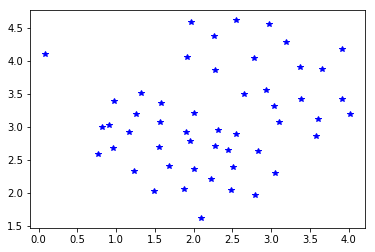

In [2]:
data = loadmat('ex6data1.mat')
data.keys()#dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X = data['X']
y = data['y'][:,0]
print('X shape: ', X.shape, ' y shape: ', y.shape)
pl.plot(X[:,0], X[:,1], '*b', linewidth=3)
pl.show()

Xpos shape:  (21, 2) Xneg shape:  (30, 2)


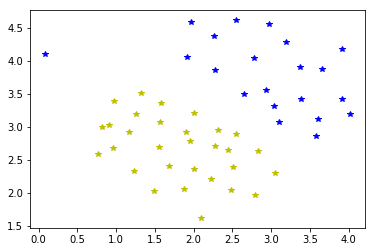

In [3]:
# specify positive and negative points with different colors
Xpos = X[y == 1,:]
Xneg = X[y == 0,:]
print('Xpos shape: ', Xpos.shape, 'Xneg shape: ', Xneg.shape)
pl.plot(Xpos[:,0], Xpos[:,1], '*b')
pl.plot(Xneg[:,0], Xneg[:,1], '*y')
pl.show()

With large $C = 100$, the SVM algorithm tries to classify all the example correctly. The role of C is similar to $\frac{1}{\lambda}$ in the regularization in regression algorithm. 

[  4.68150544  13.08944402]


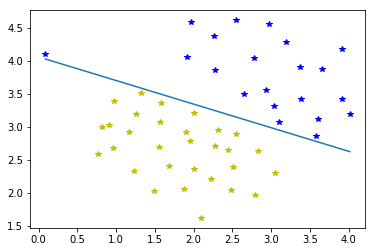

In [4]:
# loading SVM library
from sklearn.svm import SVC
clf = SVC(C=100, kernel='linear')
clf.fit(X,y)
w = clf.coef_[0]
a = -w[0]/w[1]
print(w)
x = np.linspace(np.amin(X[:,0]), np.amax(X[:,0]),100)
yx = -clf.intercept_[0]/w[1] + a*x
pl.plot(x,yx)
pl.plot(Xpos[:,0], Xpos[:,1], '*b')
pl.plot(Xneg[:,0], Xneg[:,1], '*y')
pl.show()


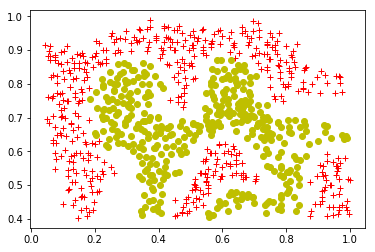

In [5]:
data2 = loadmat('ex6data2.mat')
data2.keys() #dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X = data2['X']
y = data2['y'][:,0]
Xpos = X[y==1,:]
Xneg = X[y==0,:]
pl.plot(Xpos[:,0], Xpos[:,1], '+r')
pl.plot(Xneg[:,0], Xneg[:,1], 'oy')
pl.show()

In this example we try SVM with Gaussian kernel which can be found in `kernel='rbf'` with paramters:
$$ e^{-\gamma||x-x'||^2} $$

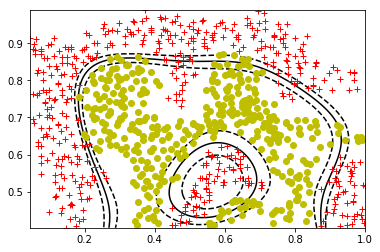

In [6]:
# fitting data
clf2 = SVC(C=100, kernel='rbf', gamma=4)
clf2.fit(X,y)

# plotting
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#pl.pcolormesh(xx,yy, Z>0, cmap=pl.cm.Paired)
pl.plot(Xpos[:,0], Xpos[:,1], '+r')
pl.plot(Xneg[:,0], Xneg[:,1], 'oy')
pl.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--','-','--'], 
           levels=[-.5, 0, .5])
pl.show()

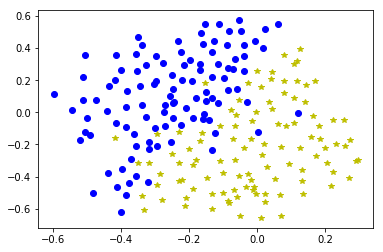

In [7]:
data3 = loadmat('ex6data3.mat')
data3.keys() #dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

X = data3['X']
y = data3['y'][:,0]

Xpos = X[y==1,:]
Xneg = X[y==0,:]

pl.plot(Xpos[:,0], Xpos[:,1], 'bo')
pl.plot(Xneg[:,0], Xneg[:,1], 'y*')
pl.show()

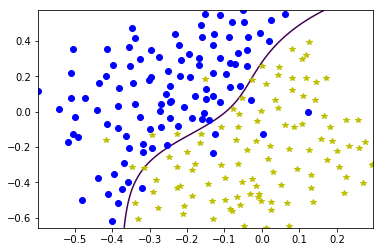

In [8]:
# reading cross validation dataset
Xval = data3['Xval']
yval = data3['yval']
# dataset #3, Fitting
values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
# loop to try different values of sigma and C

#for Cv in values:
#    for sigma in values:
#        clf3 = SVC(C=Cv, kernel='rbf', gamma=.5/(sigma**2))
#        clf3.fit(X,y)
#        acc = 100 * np.mean( (clf3.predict(Xval) == yval)*1.)
#        print('for C=', Cv, ' and gamma=', sigma, 'Accuracy=', acc)
        
clf3 = SVC(C=100, kernel='rbf', gamma=2)
clf3.fit(X,y)
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf3.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx,yy,Z, levels=[0.])
pl.plot(Xpos[:,0], Xpos[:,1], 'bo')
pl.plot(Xneg[:,0], Xneg[:,1], 'y*')
pl.show()